In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#! pip install openpyxl

In [3]:
data = pd.read_excel('podcasts_en.xlsx', 
                     engine='openpyxl')

In [4]:
data 

,podcast_name,podtail_link,itunes_id,podcastindex_id,description,rss_link,language,categories,number_of_podcasts,rating
0,Huberman Lab,https://podtail.com/podcast/huberman-lab/,1545953110,1365758,Huberman Lab discusses neuroscience: how our b...,https://hubermanlab.libsyn.com/rss,en,"Health,Fitness,Science",173.0,4.9
1,Dateline NBC,https://podtail.com/podcast/dateline-nbc/,1464919521,945141,"Current and classic episodes, featuring compel...",https://podcastfeeds.nbcnews.com/dateline-nbc,en,"News,Society,Culture,True Crime",469.0,4.4
2,SmartLess,https://podtail.com/podcast/smartless/,1521578868,150970,"SmartLess with Jason Bateman, Sean Hayes, & Wi...",https://feeds.simplecast.com/pvzhyDQn,en,"Comedy,Education,Society,Culture",184.0,4.7
3,The Daily,https://podtail.com/podcast/the-daily/,1200361736,743229,This is what the news should sound like. The b...,http://rss.art19.com/the-daily,en,"News,Daily",1973.0,4.4
4,Stuff You Should Know,https://podtail.com/podcast/stuff-you-should-k...,278981407,827592,"If you've ever wanted to know about champagne,...",https://feeds.megaphone.fm/stuffyoushouldknow,en-US,"Society,Culture",2218.0,4.5
...,...,...,...,...,...,...,...,...,...,...
14215,The Disability Download,https://podtail.com/podcast/the-disability-dow...,1481848893,1189273,The Disability Download is brought to you by p...,https://feeds.simplecast.com/NA07z9wU,en,"News,Commentary,Society,Culture,Personal,Journals",50.0,5.0
14216,Dialogos Radio,https://podtail.com/podcast/dialogos-radio/,477513997,1059851,"Dialogos Radio features weekly, in-depth discu...",https://www.media.net.gr/austinhellenicradio/p...,en,"Society,Culture,News,Politics,Arts",371.0,5.0
14217,Did Nothing Wrong podcast,https://podtail.com/podcast/did-nothing-wrong-...,1647010767,5724144,"Politics at the intersection of extremists, pr...",https://api.substack.com/feed/podcast/78644.rss,en,"News,Commentary,Politics",106.0,4.7
14218,Huberman Lab,https://podtail.com/podcast/huberman-lab/,1545953110,1365758,Huberman Lab discusses neuroscience: how our b...,https://hubermanlab.libsyn.com/rss,en,"Health,Fitness,Science",173.0,4.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14220 entries, 0 to 14219
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   podcast_name        14220 non-null  object 
 1   podtail_link        14220 non-null  object 
 2   itunes_id           14220 non-null  int64  
 3   podcastindex_id     14220 non-null  int64  
 4   description         14220 non-null  object 
 5   rss_link            14220 non-null  object 
 6   language            14220 non-null  object 
 7   categories          14220 non-null  object 
 8   number_of_podcasts  14219 non-null  float64
 9   rating              14220 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [6]:
data.isna().sum()

podcast_name          0
podtail_link          0
itunes_id             0
podcastindex_id       0
description           0
rss_link              0
language              0
categories            0
number_of_podcasts    1
rating                0
dtype: int64

In [7]:
# data = data.dropna()
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [8]:
cat_set = set()
for cat in data['categories']:
    for c in cat.split(','):
        cat_set.add(c)

In [9]:
len(cat_set)

106

In [10]:
cat_set

{'After-Shows',
 'Alternative',
 'Animals',
 'Animation',
 'Arts',
 'Astronomy',
 'Automotive',
 'Aviation',
 'Baseball',
 'Basketball',
 'Beauty',
 'Books',
 'Buddhism',
 'Business',
 'Careers',
 'Chemistry',
 'Christianity',
 'Comedy',
 'Commentary',
 'Courses',
 'Crafts',
 'Cricket',
 'Culture',
 'Daily',
 'Design',
 'Documentary',
 'Drama',
 'Earth',
 'Education',
 'Entertainment',
 'Entrepreneurship',
 'Family',
 'Fantasy',
 'Fashion',
 'Fiction',
 'Film',
 'Fitness',
 'Food',
 'Football',
 'Games',
 'Garden',
 'Golf',
 'Government',
 'Health',
 'Hinduism',
 'History',
 'Hobbies',
 'Hockey',
 'Home',
 'How To',
 'Improv',
 'Interviews',
 'Investing',
 'Islam',
 'Journals',
 'Judaism',
 'Kids',
 'Language',
 'Learning',
 'Leisure',
 'Life',
 'Management',
 'Manga',
 'Marketing',
 'Mathematics',
 'Medicine',
 'Mental',
 'Music',
 'Natural',
 'Nature',
 'News',
 'Non-profit',
 'Nutrition',
 'Parenting',
 'Performing',
 'Personal',
 'Pets',
 'Philosophy',
 'Physics',
 'Places',
 'Poli

In [11]:
cat_df = {c:[] for c in cat_set}

for cat in data['categories']:
    for k in cat_df.keys():
        if k in cat.split(','):
            cat_df[k].append(1)
        else:
            cat_df[k].append(0)
            
cat_df = pd.DataFrame(cat_df)

In [12]:
cat_df

,Kids,Islam,Mental,Crafts,Language,Visual,Manga,Hockey,Interviews,Basketball,...,Spirituality,Politics,Life,Medicine,Golf,Fantasy,Baseball,Travel,Astronomy,Books
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14215,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14216,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
cat_freq = {'category': [],
            'frequency': [],
            'episods': [],
            'mean_rating': []}

for col in cat_df.columns:
    cat_freq['category'].append(col)
    cat_freq['frequency'].append(cat_df[col].sum())
    cat_freq['episods'].append(data.loc[cat_df[col]==1,
                                        'number_of_podcasts'].sum())
    cat_freq['mean_rating'].append(data.loc[cat_df[col]==1,
                                            'rating'].mean())
    
cat_freq = pd.DataFrame(cat_freq)

cat_freq = cat_freq.sort_values(by='frequency', 
                                ascending=False).reset_index(drop=True)

In [14]:
cat_freq

,category,frequency,episods,mean_rating
0,Society,4084,429450.0,3.959647
1,Culture,4028,424443.0,3.954816
2,Education,2971,319246.0,3.842410
3,Business,2486,304704.0,3.789743
4,Health,2409,254605.0,3.958364
...,...,...,...,...
101,Aviation,12,718.0,4.116667
102,Crafts,11,440.0,2.700000
103,Cricket,5,811.0,2.860000
104,Hinduism,4,62.0,2.500000


# Try yourself: Visualization

In [15]:
data['description'][1]

'Current and classic episodes, featuring compelling true-crime mysteries, powerful documentaries and in-depth investigations.'

In [20]:
'*'.join(['MB','Ahmadi'])

'MB*Ahmadi'

In [23]:
' '.join(data.loc[cat_df['Fitness']==1, 'description'])

'Huberman Lab discusses neuroscience: how our brain and its connections with the organs of our body control our perceptions, our behaviors, and our health. We also discuss existing and emerging tools for measuring and changing how our nervous system works. Dr. Andrew Huberman is a tenured professor of neurobiology and ophthalmology at Stanford School of Medicine. His laboratory studies neural regeneration, neuroplasticity, and brain states such as stress, focus, fear, and optimal performance. For more than 20 years, Dr. Huberman has consistently published original research findings and review articles in top-level peer-reviewed journals, including Nature, Science, Cell, Neuron, and Current Biology... The Dr. Gabrielle Lyon Show promotes a healthy world, and in order to have a healthy world, we must have transparent conversations. This show is dedicated to such conversations as the listener  your education, understanding, strength, and health are the primary focus. The goal of this show

In [24]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [37]:
from wordcloud import WordCloud

from wordcloud import STOPWORDS

In [38]:
wc = WordCloud(background_color='white')

In [39]:
text = ' '.join(data.loc[cat_df['Fitness']==1, 'description'])
wordcloud = wc.generate_from_text(text)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

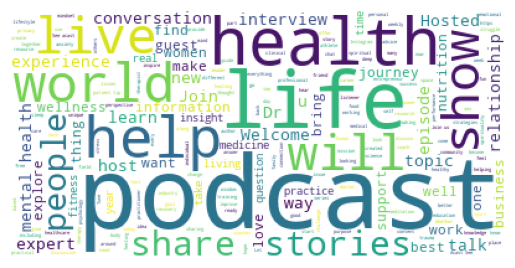

In [40]:
plt.imshow(wordcloud);
plt.axis('off')

In [41]:
wordcloud.words_

{'podcast': 1.0,
 'life': 0.5474137931034483,
 'health': 0.35272988505747127,
 'help': 0.27729885057471265,
 'world': 0.2449712643678161,
 'show': 0.22701149425287356,
 'live': 0.22341954022988506,
 'will': 0.21192528735632185,
 'stories': 0.21048850574712644,
 'share': 0.20905172413793102,
 'people': 0.20043103448275862,
 'conversation': 0.20043103448275862,
 'expert': 0.1968390804597701,
 'experience': 0.1961206896551724,
 'talk': 0.1875,
 'learn': 0.1875,
 'topic': 0.1853448275862069,
 'interview': 0.1839080459770115,
 'relationship': 0.1788793103448276,
 'Dr': 0.17456896551724138,
 'Join': 0.17385057471264367,
 'Welcome': 0.17313218390804597,
 'way': 0.16954022988505746,
 'Hosted': 0.15876436781609196,
 'new': 0.15804597701149425,
 'mental health': 0.15660919540229884,
 'episode': 0.15517241379310345,
 'u': 0.15445402298850575,
 'host': 0.14870689655172414,
 'information': 0.14870689655172414,
 'guest': 0.14727011494252873,
 'journey': 0.14511494252873564,
 'love': 0.14295977011494

In [42]:

text1 = ' '.join(data.loc[cat_df['Business']==1, 'description'])
text2 = ' '.join(data.loc[cat_df['Education']==1, 'description'])
text3 = ' '.join(data.loc[cat_df['Society']==1, 'description'])
text4 = ' '.join(data.loc[cat_df['Culture']==1, 'description'])

wordcloud1 = WordCloud(width=400, height=400, background_color='white').generate(text1)
wordcloud2 = WordCloud(width=400, height=400, background_color='white').generate(text2)
wordcloud3 = WordCloud(width=400, height=400, background_color='white').generate(text3)
wordcloud4 = WordCloud(width=400, height=400, background_color='white').generate(text4)


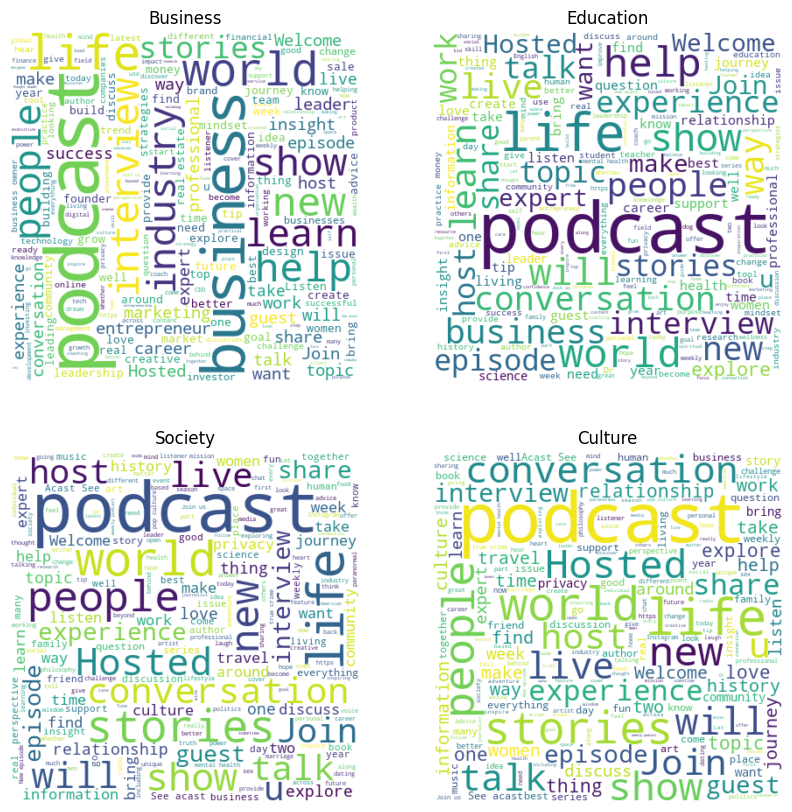

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].imshow(wordcloud1, interpolation='bilinear')
axes[0, 0].set_title('Business')
axes[0, 0].axis('off')

axes[0, 1].imshow(wordcloud2, interpolation='bilinear')
axes[0, 1].set_title('Education')
axes[0, 1].axis('off')

axes[1, 0].imshow(wordcloud3, interpolation='bilinear')
axes[1, 0].set_title('Society')
axes[1, 0].axis('off')

axes[1, 1].imshow(wordcloud4, interpolation='bilinear')
axes[1, 1].set_title('Culture')
axes[1, 1].axis('off')

plt.show()
